PREDICITING EMPLOYEE PROMOTION

In [3]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

DATA EXPLORATION

In [4]:
#dataset can be downloaded from kaggle: https://www.kaggle.com/datasets/arashnic/hr-ana
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


- There are 54808 rows in the dataset
- There are 13 columns
- There are 8 numerical columns and 5 categorical columns

In [6]:
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

- There are two columns which has null values, education and previous year rating.
- Will be filled later using means and modes befores machine learning modelling

In [7]:
train.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,0,54,0


In [8]:
#statistic description for numerical column
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


- The average of worker from the dataset are 34 years old.
- The average percentage of workers that gets promoted are 8.5 percent
- The average score are 63 with minimun be 39 and the highest be 99

In [9]:
#statistic description for categorical column
train.describe(include=['object']).T

,count,unique,top,freq
department,54808,9,Sales & Marketing,16840
region,54808,34,region_2,12343
education,52399,3,Bachelor's,36669
gender,54808,2,m,38496
recruitment_channel,54808,3,other,30446


- The departments that comes up a lot are Sales and Marketing which means it is the one that has the most employees
- Most employees are men
- Most employees have at least bachelor's degree

DATA VISUALIZATION

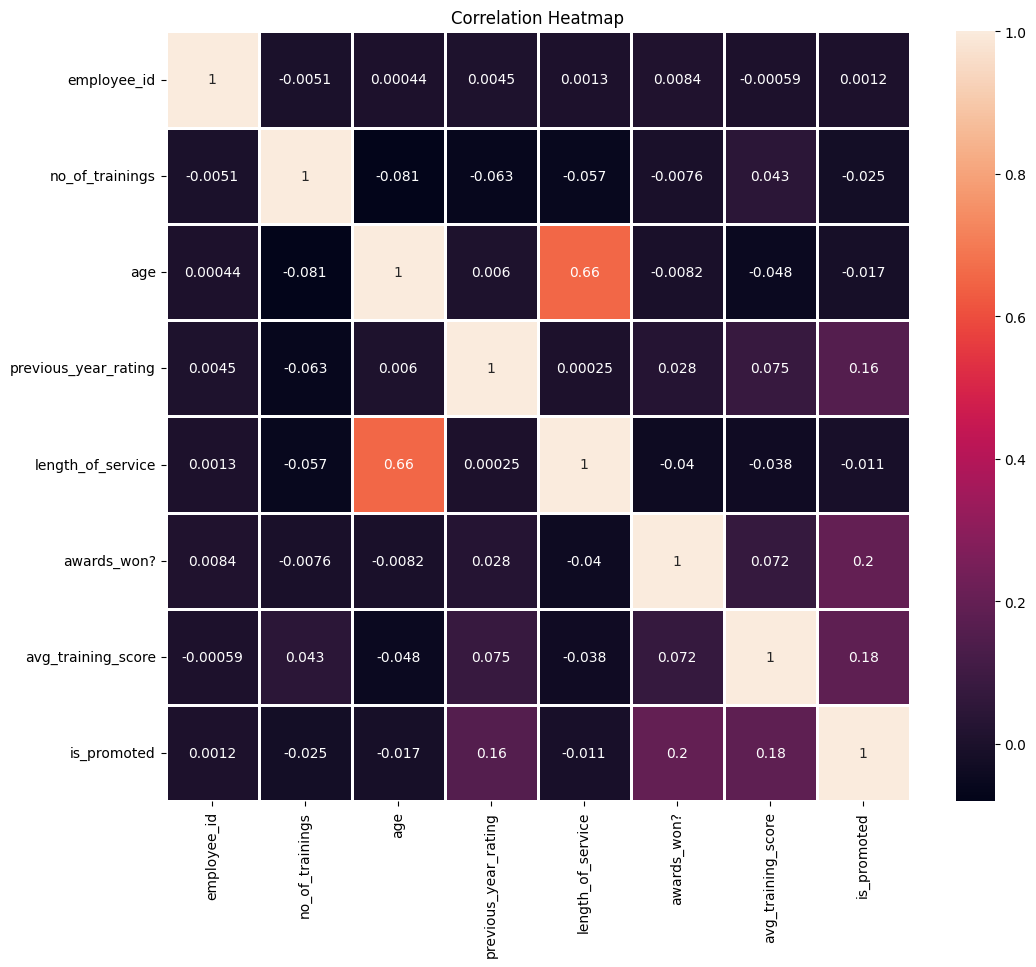

In [10]:
#sns heatmap to investigate correlation between column

numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 10))
sns.heatmap(train[numeric_columns].corr(), annot=True, square=False, linewidth=0.8)
plt.title('Correlation Heatmap')
plt.show()

- There are correlations between whether an employee wins an award or not with whether they get promoted which is 0.2

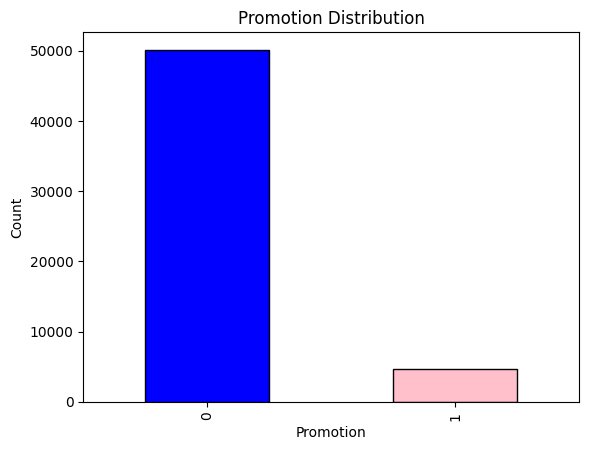

In [11]:
promotion_counts = train['is_promoted'].value_counts()

# Plot a bar chart
promotion_counts.plot(kind='bar', color=['blue', 'pink'], edgecolor='black')

# Add labels and title
plt.xlabel('Promotion')
plt.ylabel('Count')
plt.title('Promotion Distribution')

# Show the plot
plt.show()

- There are more employees that does not get promotion compared to employees that gets promoted
- This can lead to class imbalance

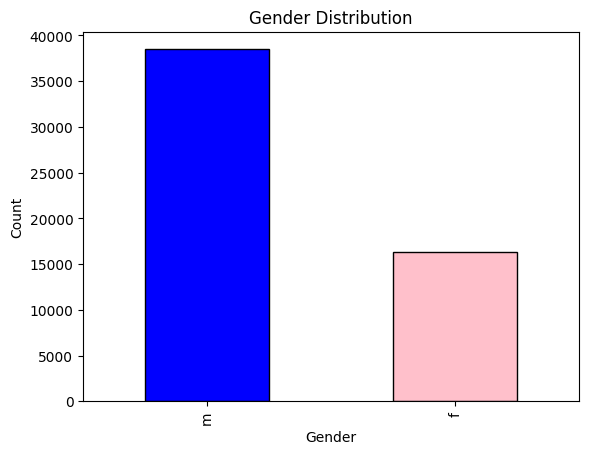

In [12]:
gender_counts = train['gender'].value_counts()

gender_counts.plot(kind='bar', color=['blue', 'pink'], edgecolor='black')

# Plotting the stacked bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

# Show the plot
plt.show()

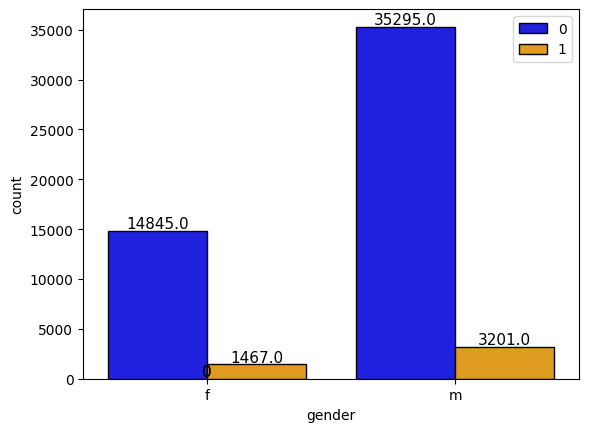

In [13]:
ax = sns.countplot(x=train['gender'], hue=train['is_promoted'], palette=['blue', 'orange'], edgecolor='black')

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.legend(loc='upper right')
plt.show()

- There are more males employees working for the company compared to the female employees
- The ratio for female employees gets promoted is better compared to the male counterpart

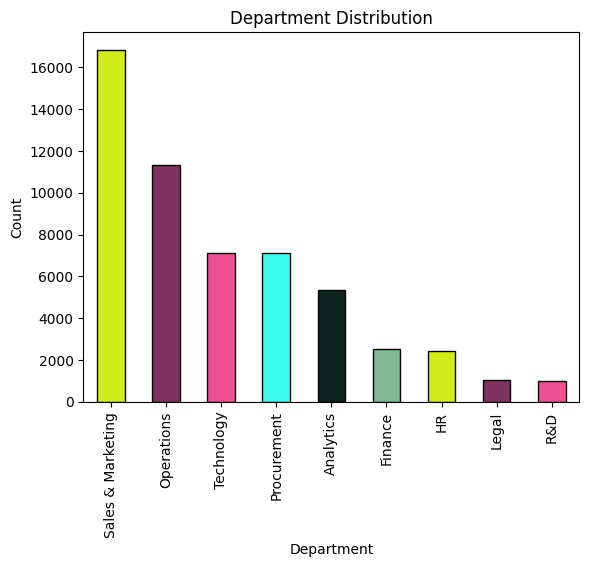

In [14]:
department_counts = train['department'].value_counts()
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(6)] 
department_counts.plot(kind='bar', color=colors, edgecolor='black')

# Plotting the stacked bar chart
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Department Distribution')

# Show the plot
plt.show()

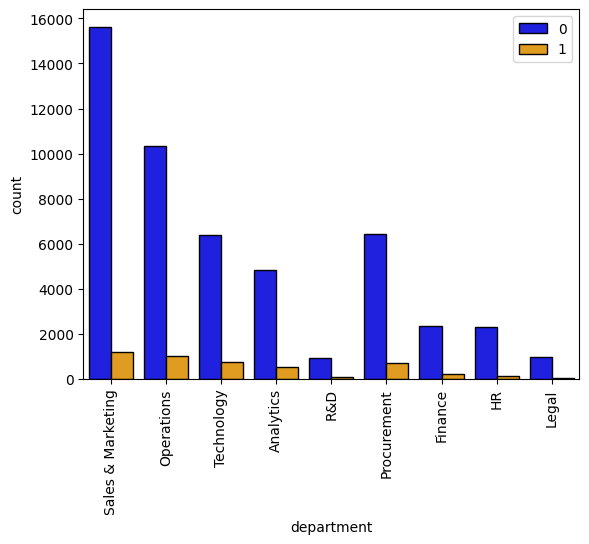

In [15]:
sns.countplot(x=train['department'], hue=train['is_promoted'], palette=['blue', 'orange'], edgecolor='black')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

Top three departments with the most number of employees are:

- Sales & Marketing
- Operations
- Procurement

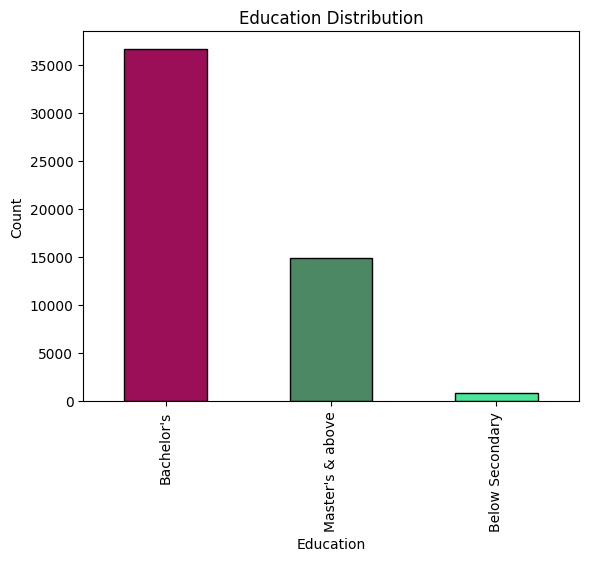

In [16]:
department_counts = train['education'].value_counts()
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(6)] 
department_counts.plot(kind='bar', color=colors, edgecolor='black')

# Plotting the stacked bar chart
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Distribution')

# Show the plot
plt.show()

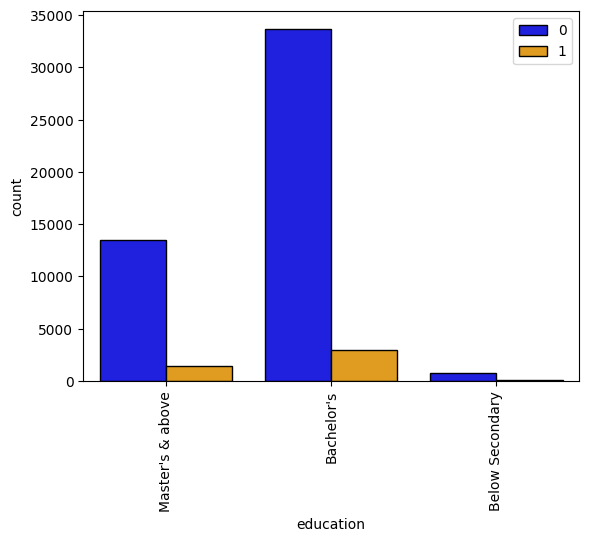

In [17]:
sns.countplot(x=train['education'], hue=train['is_promoted'], palette=['blue', 'orange',], edgecolor='black')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

- Most of the workers have bachelor's degree education
- Majority of the workers that gets promoted have bachelor's degree as their highest education
- This can be concluded that bachelor's degree is sufficient to get promoted

DATA TRANSFORMATION - FILL IN MISSING DATA AND ONE HOT ENCODING CATEGORICAL DATA

In [18]:
train['previous_year_rating'].fillna(train['previous_year_rating'].median(),inplace=True)
test['previous_year_rating'].fillna(test['previous_year_rating'].median(),inplace=True)

In [19]:
train['education'].fillna(train['education'].mode()[0],inplace=True)
test['education'].fillna(test['education'].mode()[0],inplace=True)

In [20]:
df_train = train.drop(['employee_id'], axis = 1)
df_test = test.drop(['employee_id'], axis = 1)

In [21]:
train_cat = df_train.select_dtypes(include=['object']).columns
train = pd.get_dummies(df_train, drop_first=True, columns=train_cat)
train.head()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,0,49,0,False,False,False,...,False,False,True,False,False,False,True,False,False,True
1,1,30,5.0,4,0,60,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1,34,3.0,7,0,50,0,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,2,39,1.0,10,0,50,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,1,45,3.0,2,0,73,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [22]:
test_cat = df_test.select_dtypes(include=['object']).columns
test = pd.get_dummies(df_test, drop_first=True, columns=test_cat)
test.head()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,24,3.0,1,0,77,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,1,31,3.0,5,0,51,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,31,1.0,4,0,47,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,3,31,2.0,9,0,65,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,30,4.0,7,0,61,True,False,False,False,...,False,False,False,False,False,False,False,True,False,True


MACHINE LEARNING

- Class Imbalance

In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [24]:
X = train.drop('is_promoted', axis=1)
y = train.is_promoted
X.shape, y.shape

((54808, 52), (54808,))

In [25]:
X_res, y_res = SMOTE().fit_resample(X, y.values.ravel())

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

WITHOUT DOING STANDARD SCALER

In [27]:
logistic_regression = LogisticRegression()
# Train the model using the training sets
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred = logistic_regression.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9278112266618014


WITH STANDARD SCALER

In [30]:
X_train, X_valid, y_train, y_valid = train_test_split(X_res, y_res, test_size = 0.3, random_state = 42)

In [31]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
test = sc.transform(test)

In [32]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train) 
predict = log_model.predict(X_valid) 

In [33]:
print("Train data Accuracy :", log_model.score(X_train, y_train))
print("Test data Accuracy :", log_model.score(X_valid, y_valid))

Train data Accuracy : 0.905393469713374
Test data Accuracy : 0.905265257279617


In conclusion, logistic regression have better accuracy without doing normalization compared to doing normalization